# Hackathon 2


## Report content

•	You have to fill in this  jupyter notebook downloadable on the moodle website of the course

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

## Report submission

•	The deadline for submission is reported on the moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “APP” on Moodle and the subsection “Soumission du rapport”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.

## Names and Noma of participants:

Part. 1: Simon Delvaux 54091900

Part. 2: Cédric Ponsard 10721900

Part. 3: Baptiste Sambon 09781900

Part. 4: Eliott Van Dieren 09731900

Part. 5: Romain Van Hauwaert 45081900

Part. 6: Maxime Vanliefde 16991900

## Regression

Concrete is the most important material in civil engineering. The concrete compressive strength is a a function of many factors such as age and ingredients. Download the file “concrete.csv” from the moodle website.  We aim to regress the concrete compressive strength (CCS) as a function of several variables:

Cement -- quantitative -- kg in a m3 mixture -- Input Variable

Blast Furnace Slag -- quantitative -- kg in a m3 mixture -- Input Variable

Fly Ash   -- quantitative -- kg in a m3 mixture -- Input Variable

Water   -- quantitative -- kg in a m3 mixture -- Input Variable

Superplasticizer   -- quantitative -- kg in a m3 mixture -- Input Variable

Coarse Aggregate   -- quantitative -- kg in a m3 mixture -- Input Variable

Fine Aggregate  -- quantitative -- kg in a m3 mixture -- Input Variable

Age -- quantitative -- Day (1~365) -- Input Variable

Concrete compressive strength -- quantitative -- MPa -- Output Variable


---
1) Report useful statistics for each variables (mean, std, percentiles, etc)

---

In [1]:
import scipy.stats as sc
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import statsmodels.stats.weightstats as sw

In [2]:
data = pd.read_csv("concrete.csv")
data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


---
2)	A data analysis always starts with a visualization of correlations. Compute the matrix of correlation between all variables and use the package seaborn to plot what is called a heatmap of correlation (command seaborn.heatmap(.) ). Draw some conclusions from this map about the factors influencing the $CCS$.

----

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
flyash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseaggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineaggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
csMPa,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


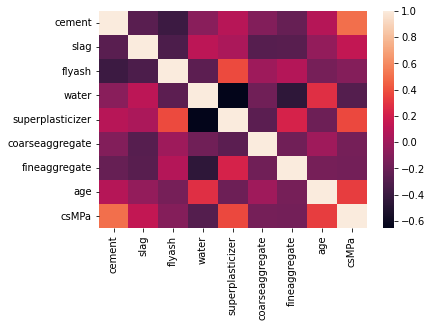

In [3]:
sb.heatmap(data.corr())
data.corr()

Nous observons grâce à la heatmap la corrélation entre la $CCS$ et les différentes variables du dataset. Ainsi, nous remarquons que la $CCS$ est positivement corrélée aux variables suivantes par ordre d'importance : "cement" (0.5), "superplasticizer" (0.366), "age" (0.33) et "slage" (0.13). Les autres variables, "water" (-0.29), "fineaggregate" (-0.167), "coarseaggregate" (-0.165) et "flyash" (-0.1) sont négativement corrélées avec la $CCS$. Les trois variables les plus corrélées avec la $CCS$ sont donc : "cement", "superplasticizer" et "age" et les trois les moins corrélées : "flyash", "slage" et "coarseaggregate". 

---
3)	Add a constant term (intercept) and perform a linear regression of the variable $CCS$ on all other explanatory variables.
i.	Report the F statistics and $R^2$:  interpret them.
ii.	Analyze the t-statistics and p-values of each coefficient of regression. Are all coefficients significant at 95%? 
Use the library statsmodels.api. The function OLS accepts pandas dataframe (use .drop() to remove columns).

---

In [4]:
y = data["csMPa"]
X = data.drop(labels="csMPa",axis=1)
Xm = sm.add_constant(X)
results = sm.OLS(y,Xm).fit()
print(results.summary())
print("Pvalues :\n", results.pvalues)

                            OLS Regression Results                            
Dep. Variable:                  csMPa   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     204.3
Date:                Sun, 14 Nov 2021   Prob (F-statistic):          6.29e-206
Time:                        18:30:51   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -23.3312     26.586  

Le coefficient de détermination $R^{2}$ nous permet de juger de la qualité de la régression linéaire. Ainsi, nous remarquons que l'approximation linéaire n'est pas excellente et est égale à 0.613 (valeur ajustée). Nous pouvons remarquer que les variables "coarseaggregate" et "fineaggregate" ne sont pas pertinentes à 95% (p-value supérieure à 5%) et seront donc retirées dans la prochaine étape. 

---
4)	Remove non-significant coefficients e.g. with $\alpha = 5\%$, except the intercept, and run again the regression. What do you notice when you compare the $R^2$, log-likelihood,  AIC and BIC (the AIC and BIC are not explained in the course, search on internet for explanations)


---

In [5]:
X_opti = X.drop(labels=["coarseaggregate", "fineaggregate"],axis=1)
Xm_opti = sm.add_constant(X_opti)
results_opti = sm.OLS(y,Xm_opti).fit()
print(results_opti.summary())
print("Pvalues :\n", results.pvalues)

                            OLS Regression Results                            
Dep. Variable:                  csMPa   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     271.2
Date:                Sun, 14 Nov 2021   Prob (F-statistic):          1.67e-207
Time:                        18:30:51   Log-Likelihood:                -3871.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1023   BIC:                             7790.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               28.9930      4.213  

Comments


5)	Which are the three most significant factors determining the $CCS$? Justify you answer with the stats reported by the regression. Show the dependence between the $CCS$ and each factor one one graph of type "scatterplot". 


cement


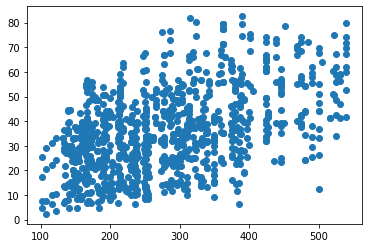

slag


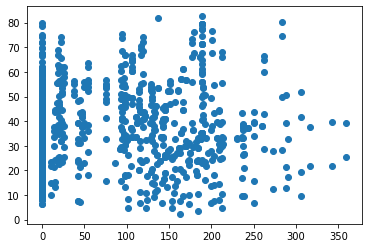

flyash


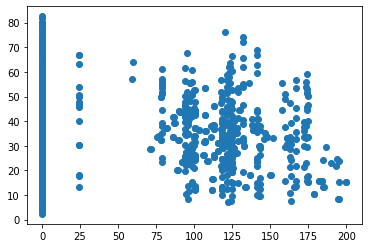

water


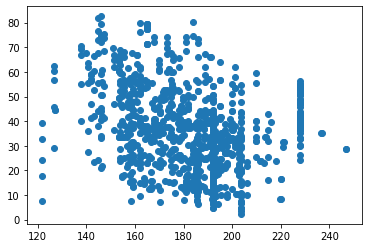

superplasticizer


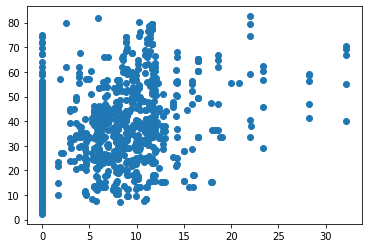

coarseaggregate


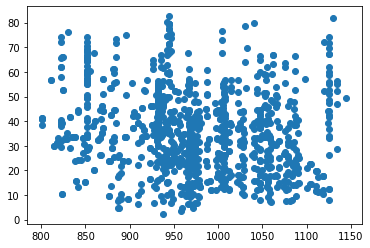

fineaggregate


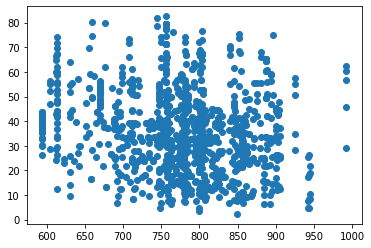

age


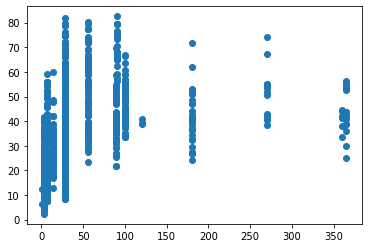

In [6]:
for column in X.columns:
    print(column)
    plt.scatter(X[column],y)
    plt.show()

Sur base des résultats de la régression effectuée, nous pouvons choisir, comme facteurs les plus pertinents, ceux qui ont la pvalue la plus grande. Les trois facteurs les plus pertinents sont donc : "age", "cement" et "slag". Les dépendances entre chaque variablee et la $CCS$ peuvent être examinées grâces aux différents scatterplots ci-dessus nous permettant ainsi d'observer les relations liant la $CCS$ et les trois facteurs les plus pertinents cités ci-dessus. 

## Statistical tests

Download the file “CO2_emissions_Canada.csv” and read the Data Description excel file. This dataset captures the details of how $CO_2$ emissions by a vehicle can vary with the different features. The dataset has been taken from Canada Government official open data website. This is a compiled version. This contains data over a period of 7 years. There are 7385 rows and 12 columns. Some abbreviations have been used to describe the features. The Data Description file contains some information regarding these.

REMARK : before running your analyses, remove from the data the vehicle propelled by natural gas. Indeed, there only one observation in that categoy and this would distort your analyses. 

In [7]:
data = pd.read_csv("CO2_emissions_Canada.csv")

row_to_remove = [x for x in range(data.shape[0]) if data["Fuel Type"][x] == "N"]
data.drop(row_to_remove, inplace=True)

data.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000
mean,3.160008,5.614978,12.556176,9.041644,10.974837,27.482394,250.589789
std,1.354252,1.828425,3.500376,2.224601,2.892633,7.232088,58.515007
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


---
1)	Can you conclude that the average $CO_2$ emission is below $300g/Km$? To do this, perform a one-sided test for a confidence level of 95% ($\alpha$=5%). Write clearly the tested assumptions and report the statistics, critical value and the p-value. What is your conclusion ?

---

In [8]:
dataCO2 = data["CO2 Emissions(g/km)"].values
n = len(dataCO2)

# descriptive analysis
mean = sc.describe(dataCO2).mean
variance = sc.describe(dataCO2).variance
print("moyenne =", mean)
print("variance =", variance)

# hypothesis
# H0 mu = 300 g/km
# H1 mu < 300 g/km
Tx = (mean - 300)/np.sqrt(variance/n)
alpha = 0.05
t_low = sc.t.ppf(q=alpha,df=n-1)
pval = (sc.t.cdf(Tx,df=n-1))

print("t_obs =", Tx)
print("percentile 5% =",t_low)
print("p-value =", pval)

moyenne = 250.58978873239437
variance = 3424.0060233063014
t_obs = -72.55966932582064
percentile 5% = -1.6450600418948351
p-value = 0.0


On teste l'hypothèse $H_0 : \mu_{CO2} = 300 g/km$, contre l'hypothèse alternative $H_1 : \mu_{CO2} < 300 g/km$, où $\mu_{CO2}$ et la moyenne des émissions de $CO_2$.  
Etant donné que $t_{obs} < t_{5\%}$, on rejette l'hypothèse $H_0$ et on accepte donc $H_1$. On remarque que la p-value est nulle (ou du moins très faible), cela peut donc être fait avec une grande certitude. Cela est compréhensible car $t_{obs}$ est largement inférieur à la valeur critique $t_{5\%}$.  
En conclusion, on accepte l'hypothèse que la moyenne des émissions de $CO_2$ est inférieure à $300 g/km$. Le contraire serait extrêmement surprenant.

---
2)	We want to determine the influence of the type of fuel on the $CO_2$ emission. We denote by $\mu_X$, $\mu_Z$, $\mu_D$, $\mu_E$ the expected $CO_2$ emissions for regular, premium gasoline, diesel and ethanol. Perform one single test for the following assumption

$H_0$ : $\mu_X = \mu_Z = \mu_D = \mu_E$

With $H_1$ : at least two of these means are different. 

This type of analysis is also called Analysis of Variance or ANOVA.

---


In [9]:
# separate the data
dataCO2_by_fuel_type = dict()
for type in ["X", "Z", "D", "E"]:
    dataCO2_by_fuel_type[type] = data[data["Fuel Type"].str.match(type)]["CO2 Emissions(g/km)"].values

# perform the test
mu = np.average(dataCO2)
k = 3

SSR = np.sum([dataCO2_by_fuel_type[t].size*np.power(np.average(dataCO2_by_fuel_type[t]) - mu, 2) for t in ["X", "Z", "D", "E"]])
MSR = SSR/k

SSE = np.sum([np.sum(np.power(dataCO2_by_fuel_type[t]-np.average(dataCO2_by_fuel_type[t]),2)) for t in ["X", "Z", "D", "E"]])
MSE = SSE/(n - k - 1)

F_star = MSR/MSE
p_value = sc.f.sf(F_star, k, n - k - 1) # more accurate than 1 - cfd

# verification
result = sc.f_oneway(*(dataCO2_by_fuel_type[t] for t in ["X", "Z", "D", "E"]))

print("F_star =", F_star)
print("p_value =", p_value)
print("Vérif :", result) # ok

F_star = 198.44550602223705
p_value = 8.858263862098714e-124
Vérif : F_onewayResult(statistic=198.44550602223688, pvalue=8.858263862102743e-124)


L'émission de CO2 est une variable aléatoire dénotée par $Y$. On définit 3 variables binaires $X_1$, $X_2$ et $X_3$ qui valent 1 si le type de carburant est respectivement regular, premium gasoline, ou diesel, et 0 sinon. On peut alors exprimer $Y$ comme suit :
$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \epsilon $$
où $\epsilon \sim \mathcal{N}(0, \sigma^2)$. Dans ce modèle, on a $\mu_X = \beta_0 + \beta_1$, $\mu_Z = \beta_0 + \beta_2$, $\mu_D = \beta_0 + \beta_3$ et $\mu_E = \beta_0$. L'hypothèse nulle et l'hypothèse alternative deviennent ainsi
$$
H_0 : \beta_1 = \beta_2 = \beta_3 = 0\\
H_1 : \exists j \textrm{ tel que } \beta_j \ne 0
$$
Ce qui peut se vérifier avec un F-test comme effectué ci-dessus.  

Comme la p-valeur est plus petite que $5\%$, on se doit de rejeter l'hypothèse $H_0$. On conclut en disant que les moyennes de consommation sont très probablement différentes en fonction du type de carburant utilisé (regular, premium gasoline ou diesel).

---
3)	Under the assumption of equal variances, test if the $CO_2$ emissions are on average equal for vehicles fuelled by regular gasoline (X) or diesel (D) : $\mu_X  = \mu_D$ (use a two-sided test and a confidence level of 95%, i.e. $\alpha$=5% ). Report the statistics, critical values and the p-value.

---

In [10]:
Xb = np.mean(dataCO2_by_fuel_type["X"])
Db = np.mean(dataCO2_by_fuel_type["D"])
nX = len(dataCO2_by_fuel_type["X"])
nD = len(dataCO2_by_fuel_type["D"])
SX = np.std(dataCO2_by_fuel_type["X"], ddof=1)
SD = np.std(dataCO2_by_fuel_type["D"], ddof=1)

Spool = np.sqrt(((nX-1)*SX**2+(nD-1)*SD**2)/(nX+nD-2))
Tx = (Xb - Db) / (Spool * np.sqrt(1 / nX + 1 / nD))
print("T_observé :", Tx)

#bornes de la student T pour l'interval de confiance [5%;95%]
t_0025 = sc.t.ppf(q=alpha / 2, df=nX + nD - 2)
t_0975 = sc.t.ppf(q=1 - alpha / 2, df=nX + nD - 2)
print("Borne des 2.5% de la Student T : ", t_0025 )
print("Borne des 97.5% de la Student T : ", t_0975 )

pval_X_and_D = 2 * sc.t.cdf(-np.abs(Tx), df=n + n - 2)
print("Pval = ", pval_X_and_D )

print("Vérification : ")
X1    = sw.DescrStatsW(dataCO2_by_fuel_type["X"])
X2    = sw.DescrStatsW(dataCO2_by_fuel_type["D"])
Ttest= sw.CompareMeans(X1,X2)
print("T_observé_sw :", Ttest.ttest_ind(usevar='pooled',value=0)[0])
print("p_value_sw :", Ttest.ttest_ind(usevar='pooled',value=0)[1])

T_observé : -0.552797849020187
Borne des 2.5% de la Student T :  -1.9605868223929892
Borne des 97.5% de la Student T :  1.9605868223929888
Pval =  0.5804102096689643
Vérification : 
T_observé_sw : -0.552797849020187
p_value_sw : 0.5804342718803002


Comment

---
4) The test in question 3 is performed under the assumption of equal variances. Test this assumption with a confidence level of 95% (two-sided test, $\alpha$=5%). Report the values of statistics and the critical values. What is your conclusion ? 

---

In [11]:
X1 = dataCO2_by_fuel_type["X"]
X2 = dataCO2_by_fuel_type["D"]
S1 = np.std(X1, ddof = 1)
S2 = np.std(X2, ddof = 1)

Tx = (S1**2)/(S2**2)

alpha = 0.05
f_u = sc.f.ppf(1-alpha/2, dfn = X1.size - 1, dfd = X2.size - 1)
f_l = sc.f.ppf(alpha/2, dfn = X1.size - 1, dfd = X2.size - 1)

print(Tx, f_l, f_u)

pval = 2*(1 - sc.f.cdf(Tx, dfn = X1.size - 1, dfd = X2.size - 1))
print("p_value :", pval)

print(sc.bartlett(X1, X2))

1.8841944291806993 0.8146435580419182 1.2540468186401958
p_value : 1.72593548120048e-07
BartlettResult(statistic=27.63550067535642, pvalue=1.4646582521965326e-07)


Comment

---
5)	Which is the greenest fuel, i.e. the one producing the least $CO_2$ emissions ? Answer this question using a regression, in which you may include other variables than fuel type. Justify your procedure and conclude. 

---

In [12]:
dataCO2_fuelType = dict()

for t in ["X", "Z", "D"]:
    dataCO2_fuelType[t] = list()
            
for i in data["Fuel Type"]:
    if i == "X":
        dataCO2_fuelType[i].append(1) 
    if i == "Z":
        dataCO2_fuelType[i].append(1)
    if i == "D":
        dataCO2_fuelType[i].append(1) 
    
    for o in ["X", "Z", "D"]:
        if (i != o):
            dataCO2_fuelType[o].append(0)
            
X = pd.DataFrame(data=dataCO2_fuelType) 
Xm = sm.add_constant(X)

y = (data["CO2 Emissions(g/km)"]/data["Fuel Consumption Comb (L/100 km)"]).values.reshape(-1,1)

results = sm.OLS(y,Xm).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.028e+05
Date:                Sun, 14 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:30:54   Log-Likelihood:                -336.58
No. Observations:                7384   AIC:                             681.2
Df Residuals:                    7380   BIC:                             708.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.3185      0.013   1239.092      0.0

Nous considérons ici une régression linéaire semblable à celle du point 2. 

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \epsilon $$

Mais cette fois-ci $Y$ représente l'émission de $CO_2$ par consommation de carburant.

L'émission moyenne de $CO_2$ par consommation des véhicules avec le carburant X, Z, D et E est donc respectivement égale à $\beta_0 + \beta_1$, $\beta_0 + \beta_2$, $\beta_0 + \beta_3$ et $\beta_0$.

On trouve alors,

Pour le carburant X : $\beta_0 + \beta_1 = 23.3163$  
Pour le carburant Z : $\beta_0 + \beta_2 = 23.2913$  
Pour le carburant D : $\beta_0 + \beta_3 = 26.8862$  
Pour le carburant E : $\beta_0 = 16.3185$

Le carburant produisant le moins de $CO_2$ est ainsi l'éthanol E85 (E).